In [1]:
# 0. 사용할 패키지 불러오기
import os
import numpy as np

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [2]:
width = 28
height = 28

In [3]:
# 1. 데이터셋 생성하기

In [4]:
# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

In [5]:
# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [6]:
# 데이터셋 전처리 : one-hot 인코딩
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [7]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [9]:
# 4. 모델 학습시키기
model_dir = './model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

checkpointer = ModelCheckpoint(filepath = model_dir + 'mnist_mlp.h5', monitor='val_loss', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val), callbacks=[checkpointer, early_stop])

Epoch 1/30
1558/1563 [============================>.] - ETA: 0s - loss: 0.6645 - accuracy: 0.8248
Epoch 00001: val_loss improved from inf to 0.29137, saving model to ./model\mnist_mlp.h5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6636 - accuracy: 0.8250 - val_loss: 0.2914 - val_accuracy: 0.9181
Epoch 2/30
1559/1563 [============================>.] - ETA: 0s - loss: 0.2817 - accuracy: 0.9186
Epoch 00002: val_loss improved from 0.29137 to 0.22823, saving model to ./model\mnist_mlp.h5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2815 - accuracy: 0.9187 - val_loss: 0.2282 - val_accuracy: 0.9336
Epoch 3/30
1551/1563 [============================>.] - ETA: 0s - loss: 0.2231 - accuracy: 0.9351
Epoch 00003: val_loss improved from 0.22823 to 0.18855, saving model to ./model\mnist_mlp.h5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2235 - accuracy: 0.9350 - val_loss: 0.1885 - val_accuracy: 0.9480
Epoch 4/30
1551/1563 [==========

Epoch 28/30
1562/1563 [============================>.] - ETA: 0s - loss: 0.0151 - accuracy: 0.9973
Epoch 00028: val_loss did not improve from 0.08225
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0151 - accuracy: 0.9973 - val_loss: 0.0838 - val_accuracy: 0.9794
Epoch 29/30
1559/1563 [============================>.] - ETA: 0s - loss: 0.0137 - accuracy: 0.9977
Epoch 00029: val_loss did not improve from 0.08225
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0137 - accuracy: 0.9977 - val_loss: 0.0832 - val_accuracy: 0.9786
Epoch 30/30
1558/1563 [============================>.] - ETA: 0s - loss: 0.0127 - accuracy: 0.9980
Epoch 00030: val_loss did not improve from 0.08225
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0127 - accuracy: 0.9980 - val_loss: 0.0857 - val_accuracy: 0.9784


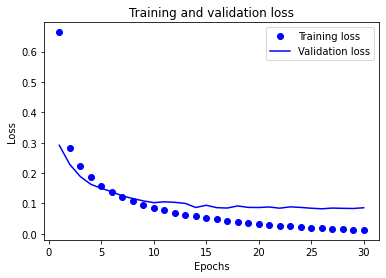

In [10]:
# 5. 학습과정 살펴보기
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

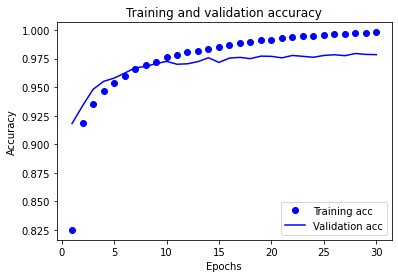

In [11]:
plt.clf()   # 그래프를 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
# 6. 모델 평가하기
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=32)
print(f'test_loss={test_loss}, test_acc={test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9792
test_loss=0.07412835955619812, test_acc=0.979200005531311


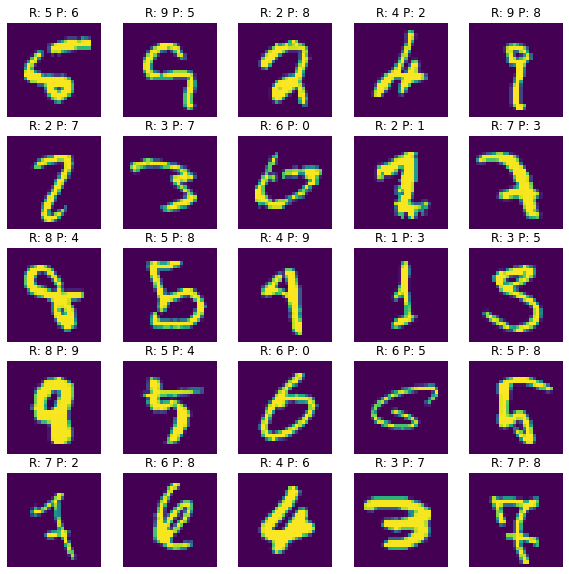

In [13]:
# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):

    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    
    sub_plt = axarr[int(cnt/plt_row), int(cnt%plt_col)]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()